In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [4]:
for i in df.columns:
  null_rate = df[i].isna().sum() / len(df) * 100
  if null_rate > 0:
    print("{} null rate: {}%".format(i, round(null_rate, 2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [5]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No data', inplace=True)
df['director'].replace(np.nan, 'No data', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [6]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


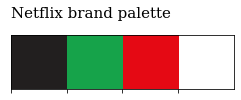

In [36]:
sns.palplot(['#221f1f', '#16a34a', '#e50914', '#fff'])
plt.title("Netflix brand palette",
          loc='left',
          fontfamily='serif',
          fontsize=15,
          y=1.2)
plt.show()


In [8]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r=((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T

[]

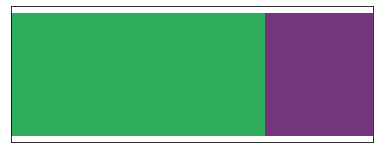

In [34]:
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#16a34a', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#661f6f', alpha=0.9, label='Female')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])


In [17]:
#annotating code starts here
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%",
                xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2,i),
                va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                color='white')
    ax.annotate("TV Shows", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
plt.show()

In [18]:
from datetime import datetime
tl_dates = [
    "1997nFounded",
    "1998nMail Services",
    "2003nGoes Public",
    "2007nStreming service",
    "2016nGoes Global",
    "2021nNetflix & Chill"
]
tl_x = [1,2,4,5.3,8,9]

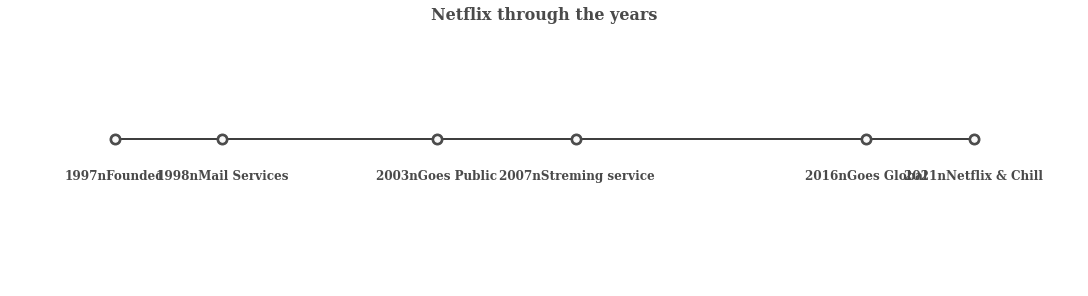

In [19]:
fig,ax = plt.subplots(figsize=(15,4),constrained_layout=True)
ax.set_ylim(-2,1.5)
ax.set_xlim(0,10)
ax.axhline(0, xmin=0.1, xmax=0.9,c="#000000",zorder=1)
ax.scatter(tl_x,np.zeros(len(tl_x)),s=120,c="#4a4a4a",zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
plt.show()

In [21]:
df['country']

df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country']

0       United States
1        South Africa
2       United States
3       United States
4               India
            ...      
8802    United States
8803    United States
8804    United States
8805    United States
8806            India
Name: first_country, Length: 8790, dtype: object

In [24]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)
df['count']=1 #helper column
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

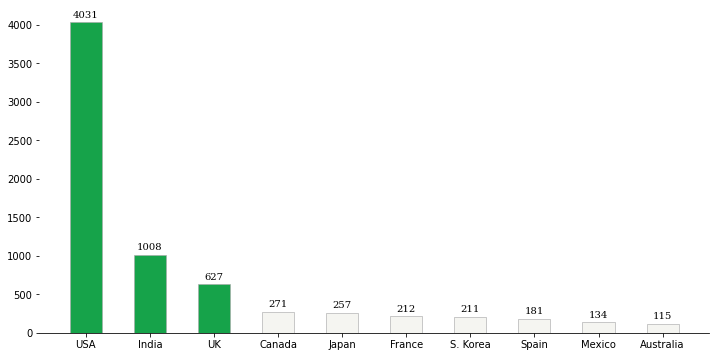

In [33]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#16a34a'
fig,ax = plt.subplots(1,1,figsize=(12,6))
#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

In [26]:
#Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')
fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(1.1, 0.67, '''
Here we see that US is major content 
producers for Netflix, and on second
we have India after UK and so on.
Netflix being a US Company, it makes 
sense that they major producers.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.5)

In [27]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

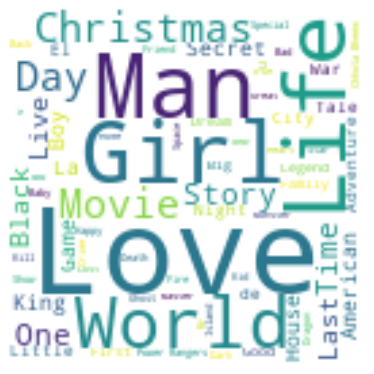

In [30]:
paintcmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('mask.png'))
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200, max_words = 150, mask = mask).generate(text)
plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()